## An Experimental Evaluation of Several Algorithms for the Sparse Vector Recovery Problem 


####Jeff Tian

###Overview


In this experimental sequence, we evaluate five different approximation algorithms for the planted sparse vector recovery problem:<br><br>
i) NONLIN_RANDVEC, the non-linear operator presented in Wright et al's paper [QSW14], with a random initialization vector with each component generated i.i.d. $\backsim\mathcal{N}(0,1)$. Since this algorithm requires a regularization parameter $\lambda$, we use $\lambda = 1 / \sqrt p$, where $p$ is the ambient space dimension in a given instance of the sparse vector problem.<br>
ii) NONLIN_RANDROW, the same non-linear operator, with initialization equal to a row selected uniformly and at random from our orthonormal basis $Y\in\mathbb{R}^{p\times n}$ for $S$.<br>
iii) NONLIN_SPECROW, the non-linear operator, with initialization equal to a row selected uniformly and at random from the set of rows $Y_i$ in $Y$ s.t. $x_i \ne 0$, where $x$ is the planted sparse vector in $S$.<br>
iv) LINEAR_OPERATR, the linear operator devised by Steurer et al through insights from sum-of-squares method, with a random initialization vector with each component generated i.i.d. $\backsim\mathcal{N}(0,1)$.<br>
v) LIN_AND_NONLIN, a combination of the two aforementioned operators, which first runs the linear operator according procedure in described in part (iv), and uses the output as the initialization to the non-linear operator, whose resulting output is used as the final output in this procedure.

###Framework

The general framework for all of our experiments is very similar to the one used by Wright, and we generate random instances of the planted sparse vector problem as follows: first, for a given set of parameters $(n,p,k)$, we generate an $n$ dimensional subspace $S\in \mathbb{R}^{p}$ by first generating an $n-1$ dimensional subspace with basis $G$ and adding a $k$-sparse vector $x_0$ to this basis. $G$ is generated with by drawing each entry i.i.d. according to $G_{ij}\backsim\mathcal{N}(0,\frac 1 p)$. $x_0$ is generated by uniformly choosing a random $k$-sized subset $I\subseteq \{1,2,...,n\}$ so that $x_i = 1\ \forall i\in I$, and $x_i = 0$ else. The basis $Y$ for $S$ is then taken to be the result of applying the Gram-Schmidt orthonormalization operator to $[x_0, G]$. $Y$ is the resulting instance of the planted sparse vector problem.

To run our tests, we rely on an implementation of the aforementioned algorithms and test procedures in Python, contained within the file <code>planted_sparse.py</code>:

In [1]:
import planted_sparse as lib
%matplotlib inline

Planted Sparse Vector Recovery Comparison Tests


The main function within our library we rely on is the <code>run</code> function. The first argument of this function is a python list, containing all of the values of $n$ to run the experiment on. The second argument is a function that encodes the $n$ vs $p$ relationship (since we decide to have a fixed relationship between $n$ and the other parameters $p, k$ of the experiment), it is a function that takes in $n$ and outputs the corresponding value for $p$. The third argument, similarly, takes in $p$ and outputs the corresponding value for $k$. The fourth argument specifies the number of times the algorithms is run, with different random choice of initialization every time. The fifth parameter specifies the number of iterations a given run of the algorithm goes for, i.e. since both the linear and non-linear algorithms are iterative, the number of iterations each algorithm takes before terminating.

###Experiments and Results

In the below sequence of experiments, we use let $n$ take on every even number between 20 to 88, inclusive. We fix the $n$ vs $p$ relationship to be $p = 5n\log n$. We fix $k = 0.1 p$. For each $n$ we generate a corresponding planted sparse vector problem instance, and run the chosen algorithm on the instance 20 times, with a different random initialization chosen each time. Each algorithm run goes for 130 iterations, empirically we determined this to be more than sufficient for convergence given our $n$ values.

For each instance we record each accuracy generated from each run of the algorithm on that instance, with accuracy function defined by $acc = |\langle x_0, x'\rangle|$ where $x_0$ is the initial planted sparse vector in the problem instance and $x'$ is the recovered sparse vector returned by each run of the algorithm. For each set of accuracies, we generate an error bar, centered at the mean $\mu$ of the accuracies produced by all runs of the algorithm on that instance, with upper and lower limits equal to $\mu \pm \sigma$ where $\sigma$ is the standard deviation of the accuracies. If $\mu + \sigma > 1$ then we cut the error bar off at 1, and do a symmetric cut-off at 0 if $\mu - \sigma < 0$. We also plot the maximum accuracy obtained on each instance with a red bar.

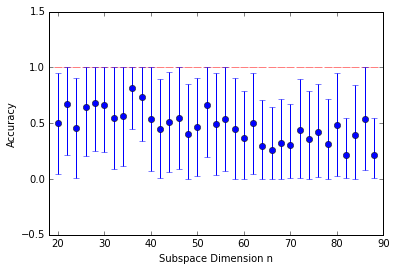

In [2]:
res = lib.run(range(20, 90, 2), lib.deriv_p, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.NONLIN_RANDVEC)
lib.plot(res)

The above illustrates the runs of the nonlinear operator with random gaussian initializers, since the algorithm works in a nonconvex way we can see that most initializers do not give good recovery guarantees, but when a good initializer is found the sparse vector is recovered with very high accuracy. 

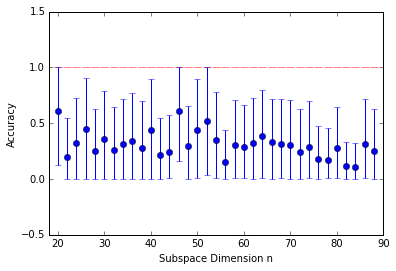

In [3]:
res = lib.run(range(20, 90, 2), lib.deriv_p, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.NONLIN_RANDROW)
lib.plot(res)

The above shows the runs of the nonlinear operator with random rows of $Y$ as initializers, it appears that the average case recovery guarantees are no better than using random gaussian vectors as initializers, but good initializers do exist amongst the rows of $Y$ (in particular, the "special rows" of $Y$ seem to always be good initializers, see the next part).

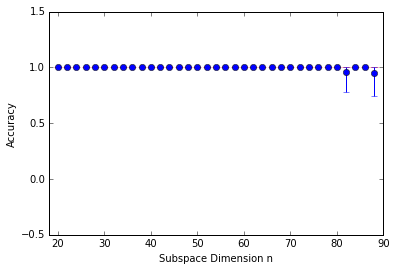

In [5]:
res = lib.run(range(20, 90, 2), lib.deriv_p, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.NONLIN_SPECROW)
lib.plot(res)

This illustrates the runs of procedure (iii), using "special rows" of $Y$ as initializers. Indeed, it appears that something about the structure of the problem causes these special rows to be ubiquitously good initializers.

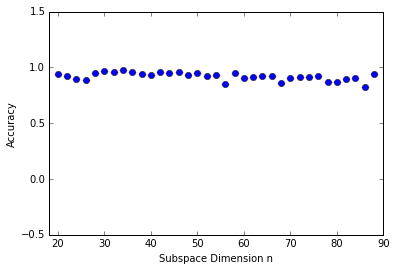

In [6]:
res = lib.run(range(20, 90, 2), lib.deriv_p, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.LINEAR_OPERATR)
lib.plot(res)

The above represents the result of running the linear operator using random gaussian initializers, as can be seen since the problem solved by the algorithm is convex, the nature of the initializers do not appear to affect the output of the algorithm at all (for each instance, 20 runs of the algorithm with different random initializers produce the same result each time). The recovery guarantees are quite good overall, but since the sparse vector recovery problem in general is a nonconvex optimization problem, it can be expected that a linear operator will not achieve perfect recovery guarantees.

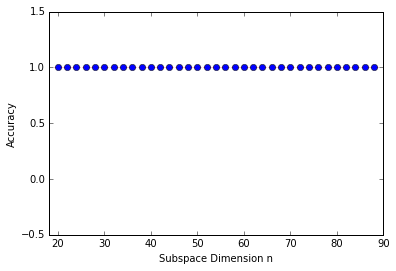

In [7]:
res = lib.run(range(20, 90, 2), lib.deriv_p, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.LIN_AND_NONLIN)
lib.plot(res)

This experiment shows the result of first running the linear operator, and then usng the output as an initializer for the nonlinear operator. The linear operator is run many times with different random initializers, but we saw before that this operator is initializer-invariant so the output will be the same with each run. It appears that the outputs of linear operator are invariantly perfect initializers for the nonlinear operator.

Now, we will try changing the relationship between $p$ and $n$ to $p = n^2$, and repeat a similar experimential sequence:

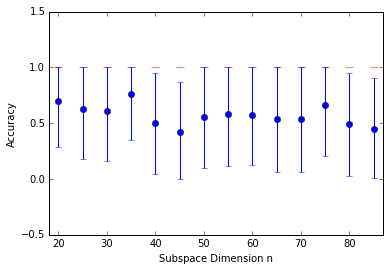

In [2]:
res = lib.run(range(20, 90, 5), lib.deriv_p2, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.NONLIN_RANDVEC)
lib.plot(res)

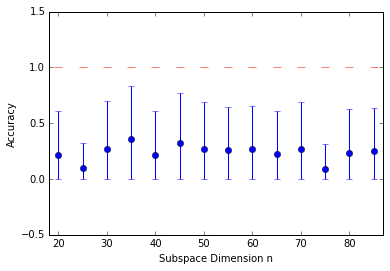

In [3]:
res = lib.run(range(20, 90, 5), lib.deriv_p2, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.NONLIN_RANDROW)
lib.plot(res)

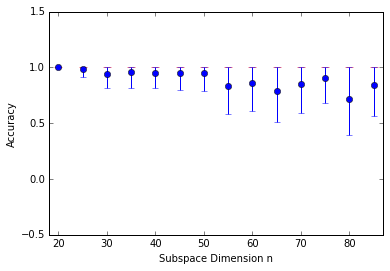

In [5]:
res = lib.run(range(20, 90, 5), lib.deriv_p2, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.NONLIN_SPECROW)
lib.plot(res)

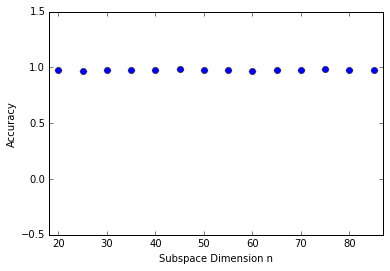

In [6]:
res = lib.run(range(20, 90, 5), lib.deriv_p2, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.LINEAR_OPERATR)
lib.plot(res)

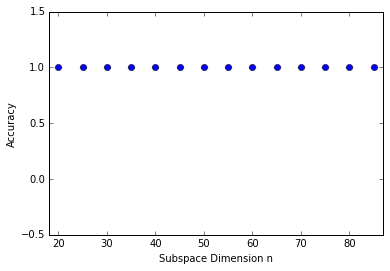

In [7]:
res = lib.run(range(20, 90, 5), lib.deriv_p2, lib.deriv_k, num_it=20, 
          num_it_alg=130, alg_type = lib.LIN_AND_NONLIN)
lib.plot(res)

As we can see, changing the relationship between $n$ and $p$ to be $p = n^2$ does not seem to change much, generally all of the properties observed for the $p = 5n\log n$ case look like they hold in this case as well.

###Analysis

From the experimental evidence, we can see that no matter if one uses random gaussian vectors or random rows or $Y$ as intializers to the nonlinear operator, in expectation the recovery guarantees will be sub-par. Thus for this algorithm to be successful the authors suggest that every normalized row of $Y$ be used as initializers and that the operator be applied to a sequence of $p$ nonconvex problems [QSW14]. Since $p$, the ambient subspace dimension, can grow quite large in many instances, this approach can prove to be quite slow for large $p$. Although choosing "special" rows of $Y$ as initializers leads to near-optimal recovery guarantees, in general we know of no way to deduce information about which rows of $Y$ are special given an arbitrary instance of the problem.

The linear operator, on the other hand, can be seen as acting as a sort of "stepping stone" operation to be performed when solving this problem. This operator optimally solves a convex problem that is closely related to the nonconvex sparse vector recovery problem we are interested in, so that the solution to the convex problem is in some sense close to optimal solution of the nonconvex problem.

Taking this into account, we can see that using the linear operator to get "close" to the optimal of nonconvex problem first, and then using the output of this as the initializer to the nonlinear operator, we obtain an algorithm that is empirically quite optimal in solving the desired nonconvex problem (given the relationships between $p, n$, and $k$ that we fix in our experiments). In particular, not only does the algorithm produced by combining the two operators recover the desired sparse vector very accurately, but it is also quite fast, because the linear operator only needs to be run once (it is initializer invariant), and the resulting outputs seem invariably to be perfect initializers to the nonlinear operator.

Of course, there are many facets still left unexplored, such as larger values for $n$ and different relationships between the variables $n, p, k$. In writing the code we attempted to make it easily extensible/customizable, so that our current framework can be used to test these various aspects quite easily.

###Conclusion

Through our experimental exploration of these different algorithms, we have uncovered aspects about their empirical performance guarantees on various sized problem instances. In particular, we found the combination of the linear and nonlinear operators to be especially promising. We believe that there is good theoretical reason for the empirical success of this combined algorithm, and sincerely hope that the experimental work done here can help shed light on nature and mechanisms of this algorithm, and perhaps help drive a proof about the guarantees of this algorithm and advance the state-of-the-art in approxiation schemes for the sparse vector recovery problem.

###References
[QSW14] Qing Qu, Ju Sun, and John Wright. Finding a sparse vector in a subspace: Linear sparsity using alternating directions. <br> $\ \ \ \ \ \ \ \ \ \ \ \ \ \ $*arXiv preprint arXiv:1412.4659*, 2014.